# Linear Algebra, Calculus, and Gradient Descent

__Objectives__
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">



It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Also matrices are the common notation used in the popular libraries like numpy, scipy and sklearn.

<img src = "./resources/matrix_multiplication.png">


This is an image from Andrew Ng's Neural Networks and Deep Learning course.

<img src = "./resources/gradient_descent.png" width  = 500>

This is an image from Andrew Ng's Sequence Model's Course. 

<img src = "./resources/lstm.png" width  = 500>

## Linear algebra and Linear Regression

- Let's move to the notebook matrix algebra with numpy :)

## Gradient Descent

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)

## Gradient in Action

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [4]:
numPoints=10
np.zeros(shape=numPoints)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + np.random.uniform(0, 1) * variance
    return x, y

In [7]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

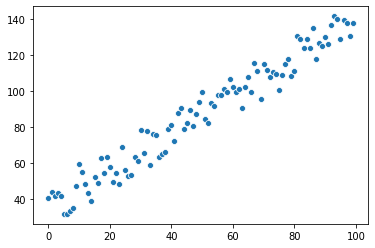

In [21]:
sns.scatterplot(x=x[:, 1], y=y)

plt.show()

In [14]:
x
theta = np.array([1.90595185,1.5342646])
np.dot(x, theta).shape

(100,)

__Your Turn__

Write a gradient descent function for this linear problem

- Inputs:
x, y, theta: initialized with some random values, alpha: learning rate, m: length of data, numiterations: number of iterations

- return: plot the errors for each iterations
- return the final theta values

In [21]:
# %load -r 1-20 supplement.py
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % (numIterations // 40) == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
        costs.append(cost)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))], color ='r')

    return theta

Iteration 0 | Cost: 198.965538
[1.90595185 1.5342646 ]
Iteration 3750 | Cost: 168.429209
[5.28759582 1.48065123]
Iteration 7500 | Cost: 143.193516
[8.36236796 1.4342943 ]
Iteration 11250 | Cost: 122.330592
[11.15808299  1.39214459]
Iteration 15000 | Cost: 105.082737
[13.70006729  1.35382026]
Iteration 18750 | Cost: 90.823542
[16.01134871  1.31897413]
Iteration 22500 | Cost: 79.035139
[18.11286516  1.28729053]
Iteration 26250 | Cost: 69.289398
[20.02365426  1.25848243]
Iteration 30000 | Cost: 61.232371
[21.76102587  1.23228888]
Iteration 33750 | Cost: 54.571444
[23.34071883  1.20847257]
Iteration 37500 | Cost: 49.064702
[24.77704359  1.18681776]
Iteration 41250 | Cost: 44.512154
[26.08301182  1.16712828]
Iteration 45000 | Cost: 40.748458
[27.27045429  1.14922575]
Iteration 48750 | Cost: 37.636925
[28.35012803  1.132948  ]
Iteration 52500 | Cost: 35.064549
[29.33181382  1.11814758]
Iteration 56250 | Cost: 32.937908
[30.22440474  1.10469039]
Iteration 60000 | Cost: 31.179765
[31.03598679 

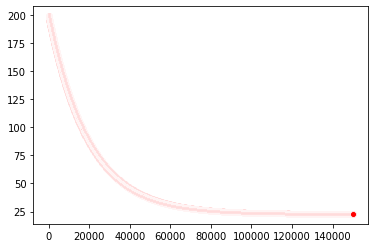

In [23]:
numIterations = 150000
alpha = 0.0001
theta = np.array([1.90595185,1.5342646])
a = gradientDescent(x, y, theta, alpha, m, numIterations)

In [24]:
a

array([38.33796422,  0.98236597])

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression(fit_intercept= False)


lr.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [27]:
lr.coef_

array([39.16676732,  0.96987049])